Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки</font>
* Очень интересная и полезная статья: https://dyakonov.org/2021/05/27/imbalance/

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, видно, что приложено много усилий.
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[3]</font>
* Спасибо за оперативность
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Цель:

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

План:

- Загрузить и подготовить данные.
- Исследовать баланс классов, обучить модель без учёта дисбаланса.
- Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найдите лучшую.
- Провести финальное тестирование.

## Подготовка данных

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# импорт библиотек для моделей машинного обучения классификации
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import time
import warnings
warnings.filterwarnings("ignore")


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>

In [2]:
# Отображение всех колонок таблиц
pd.set_option('display.max_columns', None)

In [3]:
pth1 = 'Churn.csv'
pth2 = '/datasets/Churn.csv'

if os.path.exists(pth1):
    df.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Произошла ошибка')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В поле Tensure много пропусков. Должно быть 10000 значений, мы имеем 9091. Заменим пропуски на 0.

In [5]:
df['Tenure'] = df['Tenure'].fillna(0)

<div class="alert alert-block alert-info">
<b>Совет:</b> Пропуски проанализированы и решение обработать их таким образом - допустимое . Но мне кажется, что так как природа пропусков неизвестна можно заполнить их случайными числами, чтобы не влиять на распределение или использовать медиану .
</div>

Проверяем датафрейм на дубликаты

In [6]:
df.duplicated().sum()

0

In [7]:
df['CustomerId'].duplicated().sum()

0

In [8]:
df['Surname'].duplicated().sum()

7068

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Вывод

* RowNumber — столбец индекс строки в данных не несетя ценности для обучения модели - можно удалить.
* CustomerId — уникальный идентификатор клиента дубликатов нет - можно удалить. 
* Surname — фамилия, является идентифицирующей пользователя информацией, содержит 7068 дубликатов, 2932 уникальных,сложный столбец, но нет ценности для качества будущей модели — можно удалить. 
* CreditScore — следует проверить распределение и сохранить данный столбец. 
* Geography — всего 3 уникальных значения, можно вылнить преобразование OHE 
* Gender — значение преобразовать — OHE 
* Age — Exited — тип данных верны Tenure — сколько лет человек является клиентом банка 
* Balance — баланс на счёте NumOfProducts — количество продуктов банка, используемых клиентом 
* HasCrCard — наличие кредитной карты 
* IsActiveMember — активность клиента 
* EstimatedSalary — предполагаемая зарплата 
* Exited — факт ухода клиента - целевой

<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший первичный осмотр данных
</div>

<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 

</div>


## Исследование задачи

Проводим кодирование, убирая избыточный столбец

In [10]:
df_country = pd.get_dummies(df.Geography, drop_first=True)
df_gender = pd.get_dummies(df.Gender, drop_first=True)

<div class="alert alert-block alert-success">
<b>Успех:</b>  Прямое кодирование - хороший выбор, молодец, что не забываешь про drop_first. Но советую в будущем обратить внимание на инструмент OneHotEncoder от sklearn
</div>




Формируем готовый датасет, удалив ненужные столбцы. Для столбца tenure заполняем ячейки NaN медианным значением по имеющимся значениям в столбце.

In [11]:
df_features = df.join([df_gender, df_country]).drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
df_features  = df_features.drop(['Gender', "Geography"], axis = 1) 
df_features.Tenure.fillna(df_features.Tenure.median(), inplace = True)
display(df_features)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0



<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>

Смотрим датасет

In [12]:
df_target = df.Exited
display(df_target)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Формируем выборки: 

Обучающая valid_features, valid_features

Валидационная features_valid valid_target

Тестовая test_features test_target

In [13]:
features_temp, test_features, target_temp, test_target = train_test_split(df_features, df_target, test_size=0.4,random_state=54321)
train_features, valid_features, train_target, valid_target = train_test_split(features_temp, target_temp, test_size=0.25, random_state=12345)

print(train_features.shape, valid_features.shape, test_features.shape)
print(train_target.shape,valid_target.shape, test_target.shape)

(4500, 11) (1500, 11) (4000, 11)
(4500,) (1500,) (4000,)


In [14]:
scaler = StandardScaler()
numeric_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
scaler.fit(train_features[numeric_columns])

StandardScaler()

Стандартизируем тестовую и валидную выборку

In [15]:
train_features[numeric_columns] = scaler.transform(train_features[numeric_columns])
valid_features[numeric_columns] = scaler.transform(valid_features[numeric_columns])
test_features[numeric_columns] = scaler.transform(test_features[numeric_columns])
display(train_features[numeric_columns].head())

,CreditScore,Age,Tenure,Balance,EstimatedSalary
1502,1.497448,-0.001777,0.147963,0.159732,0.076226
116,0.179598,-0.192140,0.470558,1.462843,0.259957
5786,-0.644058,0.093405,0.147963,-1.220711,0.000476
8965,-1.786881,1.806677,1.115747,1.113068,-1.324950
9172,0.941480,-0.001777,1.115747,1.017470,-0.134253



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>

так как был вопрос по параметрам, возврщаю такую реализацию

Расммотрим модели на обучающей выборке:
    
Модель Дерево решений

In [16]:
f1_score_max_tree = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max_tree:
        f1_score_max_tree=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max_tree )

max_depth: 8 F1: 0.5758157389635317


Модель Случайный лес

In [17]:
f1_score_max_Forest=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(train_features,train_target)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max_Forest:
            f1_score_max_Forest = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max_Forest)

estim_max= 27 depth_max= 18 F1_Score =  0.5852631578947369


Модель Логистическая регрессия

In [18]:
model = LogisticRegression(random_state=55555)
model.fit(train_features,train_target)
prediction = model.predict(valid_features)
print("F1_Score = ", f1_score(valid_target,prediction))

F1_Score =  0.2639593908629442


Рассматривая данные с дисбалансом (но, с переведенные категориальные и стандартизированные данные) тремя моделями можно сделать вывод, что саммая лучшая модель оказалась Случайный лес. При лучшем значении depth_max= 18 F1_Score = 0.5852, на обучающей выборке train_features,train_target.

Далее рассмотрим на тестовой выборке

Дерево решений

In [19]:
f1_score_max = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234)
    model_tree.fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max:
        f1_score_max=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max )

max_depth: 8 F1: 0.5758157389635317



<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  Модель не обучают на тестовой выборке.  Модель всегда обучают  на тренировочной.
    
На тестовой и валидационной можно только оценить модель (посчитать метрики)
    
НО тестовую нужно оценивать только в конце работы для одной лучшей модели, до этого оценивание проводится только на валидационной
    
Исправь это здесь в ячейках ниже.
    
    
P.S. Странно, что ты допустил такую ошибку в этом разделе. В других разделах у тебя все в порядке
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Привет! Исправлено.
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка[2]:</b>  Почему-то ты обучил модель на валидационной, хотя должен был на тренировочной.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Теперь понял свою ошибку. Спасибо.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[3]:</b> Есть контакт)
</div>

Случайный лес

In [20]:
f1_score_max=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(train_features,train_target)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max:
            f1_score_max = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max)

estim_max= 27 depth_max= 18 F1_Score =  0.5852631578947369


Логистическая регрессия

In [21]:
model_logistic=LogisticRegression()
model_logistic.fit(train_features,train_target)
prediction=model_logistic.predict(valid_features)
f1_score_logistic= f1_score(valid_target,prediction)
print("F1_Score = ", f1_score_logistic)

F1_Score =  0.2639593908629442


Найдем значения AUC-ROC для

Модель Дерево решений

In [22]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

auc_roc_tree

0.7059364945991665

Модель Случайны лес

In [23]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

auc_roc_forest

0.840126756514721

Модель Логистическая регрессия

In [24]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

auc_roc_reg

0.7565976406593771

ROC-кривая

<Figure size 432x288 with 0 Axes>

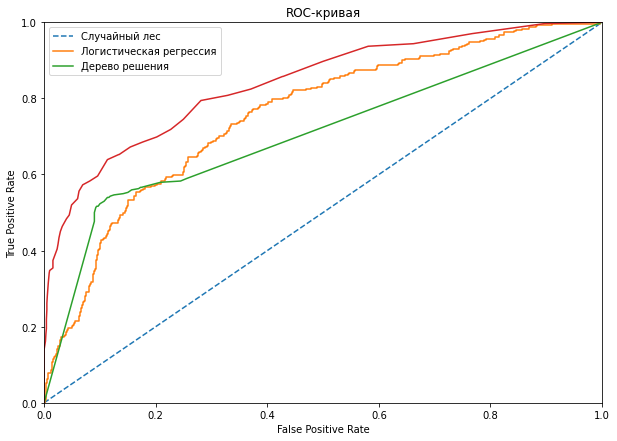

In [25]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Случайный лес примерно равную пропорцию позитивных и негативных предсказаний, выдает заметно больше качественных предсказаний, но также сильно склоняется к ложно позитивным предсказаниям (FP). Точность и качество также низкое.

Дерево решений склонно выдавать позитивные предсказания, очень высокое количество ложных позитивных предсказания (FP). Видим низкое значение F1, следовательно низкое качество модели, проблема в точности.

Регрессия показала самое низкое значение F1 и полноты.

<div class="alert alert-block alert-success">
<b>Успех:</b> А так неплохо проделан шаг,  все метрики посчитаны корректно, идем дальше.
</div>


Проверяем дисбаланс

In [26]:
target_temp.value_counts(normalize = 1)

0    0.798
1    0.202
Name: Exited, dtype: float64

Построим диаграмму баланса классов

<AxesSubplot:ylabel='Frequency'>

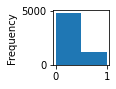

In [27]:
target_temp.plot(kind ='hist', bins=2, figsize=(1,1))

<div class="alert alert-block alert-success">
<b>Успех:</b> дисбаланс обнаружен
</div>

## Борьба с дисбалансом

На предыдущем этапе выявили, что в соотношение примерно 80 на 20: отрицательны ответов ≈ 80% , положитительных ≈ 20%. очевидно, необходмо увеличить количество положительных ответов или уменьшить кол-во отрицтаельных ответов.

In [28]:
def upsampling (features,target,repeat):
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)
    
    return upsampling_features,upsampling_target

In [29]:
def downsampling(features,target,fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    downsampling_features=pd.concat([features_null.sample(frac=0.4,random_state=1234)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=0.4,random_state=1234)]+[target_one])
    
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=1234)
    
    return downsampling_features,downsampling_target

In [30]:
features_balance_up,target_balance_up=upsampling(train_features,train_target,4)

<div class="alert alert-block alert-success">
    
<b>Успех:</b> Выбран правильный `repeat`
</div>

Метод 1

Cмотрим дерево

In [31]:
f1_score_max_tree2 = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max_tree2:
        f1_score_max_tree2=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max_tree2 )

max_depth: 5 F1: 0.5809018567639257


Регрессия

In [32]:
model_logistic=LogisticRegression(random_state=54321).fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.4782608695652174


Лес

In [33]:
f1_score_max_Forest2=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(features_balance_up,target_balance_up)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max_Forest2:
            f1_score_max_Forest2 = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max_Forest2)

estim_max= 45 depth_max= 9 F1_Score =  0.629746835443038


Метод 2.

In [34]:
features_balance_up_downsampling, target_balance_up_downsampling = downsampling(train_features,train_target,4)


<div class="alert alert-block alert-success">
    
<b>Успех:</b> Выбран правильный `fraction`
</div>

Дерево

In [35]:
f1_score_max = 0
for depth in range(1,15,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(features_balance_up_downsampling,target_balance_up_downsampling)
    prediction=model_tree.predict(valid_features)
    if f1_score(valid_target,prediction)>f1_score_max:
        f1_score_max=f1_score(valid_target,prediction)
        depth_max = depth
print('max_depth:',depth_max,'F1:',f1_score_max )

max_depth: 5 F1: 0.5987261146496815


Регрессия

In [36]:
model_logistic=LogisticRegression(random_state=54321).fit(features_balance_up_downsampling,target_balance_up_downsampling)
prediction=model_logistic.predict(valid_features)
f1_score_logistic2 = f1_score(valid_target,prediction)
print('F1:',f1_score_logistic2)

F1: 0.4864


Лес

In [37]:
f1_score_max=0
for estim in range(1,55,2):
    for depth in range(1,25,1):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators = estim, max_depth=depth)
        model_forest.fit(features_balance_up_downsampling,target_balance_up_downsampling)
        prediction = model_forest.predict(valid_features)
        if f1_score(valid_target,prediction) > f1_score_max:
            f1_score_max = f1_score(valid_target,prediction)
            estim_max=estim
            depth_max = depth
print("estim_max=", estim_max, "depth_max=", depth_max,"F1_Score = ", f1_score_max)

estim_max= 33 depth_max= 11 F1_Score =  0.6383701188455008


Вывод

Метод 1 показал лучше результаты на всех трех моделях.

Модель Логистчиеская регрессия

In [38]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

auc_roc_reg

0.7587286758283674

Модель Дерево решений

In [39]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

auc_roc_tree

0.6880355227807936

Случайный лес

In [40]:
probabilities_forest = model_forest.predict_proba(valid_features)
probabilities_one_valid_forest = probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds = roc_curve(valid_target,probabilities_one_valid_forest)

auc_roc_forest = roc_auc_score(valid_target,probabilities_one_valid_forest)

auc_roc_forest

0.8402801578790258

ROC-кривая

<Figure size 432x288 with 0 Axes>

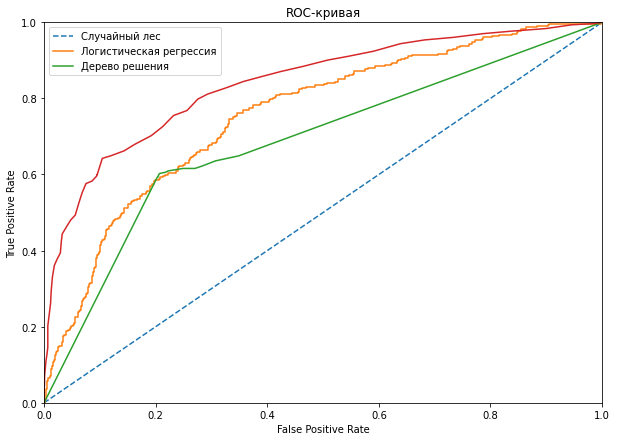

In [41]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left')
plt.show()

Вывод

Лучшее значение метрики auc roc=0.8426 у модели Случайный лес, затем у логистической регресии - 0.7594, а у дерева - 0.6923

<div class="alert alert-block alert-success">
<b>Успех:</b> хорошая работа с моделями машинного обучения.  Радует  достаточное количество расмотренных методов для борьбы с дисбалансом.

</div>


## Тестирование модели

Выводим итоги обучения:

In [42]:
rezult1={'Дерево Решения':np.array([f1_score_max_tree,f1_score_max_tree2 ]),'Случайный лес':np.array([f1_score_max_Forest,f1_score_max_Forest2]),'Логистическая регрессия':np.array([f1_score_logistic,f1_score_logistic2])}
rezult_df=pd.DataFrame(rezult1,index=['F1 без учета дисбаланса','F1 с учетом дисбаланса'])

rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1 без учета дисбаланса,0.575816,0.585263,0.263959
F1 с учетом дисбаланса,0.580902,0.629747,0.486400


Возьмем модель, показавшую лучшие результаты - Случайный лес с параметрами estim_max= 45 depth_max= 9, где F1_Score = 0.629746835443038 (чтобы убрать цикл, не очень быстро работает). переобучим модель случайный лес на тестовой выборке.

In [43]:
model_2_u = RandomForestClassifier(random_state=54321, n_estimators = 45, max_depth=9)
model_2_u.fit(features_balance_up,target_balance_up)

predict_test = model_2_u.predict(test_features)

print("F1_Score = ", f1_score(test_target, predict_test))

F1_Score =  0.6199893105291288


Результат получили чуть хуже предыдущего, но в пределах нормы.

Рассмотрим метрику AUC-ROC и поведение ROC кривой

In [44]:
probabilities_test = model_2_u.predict_proba(test_features)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(test_target, probabilities_one_test)

print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8615074206633262


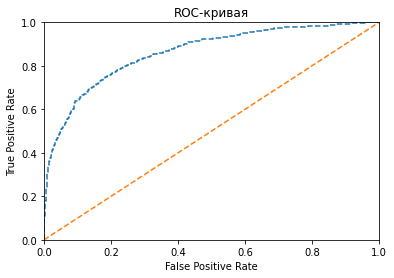

In [45]:
fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test ) 
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

<div class="alert alert-block alert-success">
<b>Успех:</b>  С тестированием все в порядке! Тебе удалось достичь хороших показателей метрик на тесте. 
</div> 


Выводы

На основании вида ROC-кривой можно сделать вывод что модель дает хорошие показатели в предсказании.

Исходная задача: Спрогнозировать возможность ухода клиенты из банка исходя из имеющихся данных. Выводы В ходе этой работы были изучены исходные данные о взаимодйствии банка и клиентов, включающие информацию об уходе клиентов из банка. Была проведена работа:разбивки категориальных данных на колонки с численными значениями (флагами), отброшены не информатиыные (для обучения моделей) колонки. Проведена стандартизация численных значений. В следствии данные были разбиты на целевые и предсказательные, было проведено обучение моделей трех типов, с целью подбора оптимальных гиперпараметров и выбора наилучшей модели.

Аналогичное исследование было проведено с данными после операции балансировки классов, в результате котороый была выбрана наилучшая модель и ее гиперпараметры - - Случайный лес. Выбор осуществлялся по максимизации метрики F1_score, а так же по итогам построения ROC кривой

Полученный показатель Случайного леса на тестовой выборке F1_Score = 0.619. А значени показателя AUC-ROC= 0.861. В итоге найдена модель, которая позволит выявить "группу" риска среди клиентов банка.

<div class="alert alert-block alert-info">
<b>Совет:</b> Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br> Очень ВАЖНАЯ для аналитики штука. Ведь нам не просто модель с метрикой нужна, а ещё и причины понять высокой/низкой метрики. Т.е. понять с какой силой сами факторы влияют на целевую.
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*